In [1]:
import pandas as pd

data = 'RAVEN/TrialRightWrong/Trial'

# All the files we need
files = ['/DEI_trial_by_trial_Right.xlsx', 
         '/DEI_trial_by_trial_Wrong.xlsx', 
         '/esec_trial_by_trial_Right.xlsx',
         '/esec_trial_by_trial_Wrong.xlsx']

In [2]:
values = {}
for file in files:
    
    # For each file
    f = pd.ExcelFile(data+file)
    
    # Initialize a dict for aggregate the fatigue values for each person and if answer right/wrong a question

    print('File: ',file)
    
    # For each Train
    for sheet in f.sheet_names[1:13]:
        
        df = pd.read_excel(f,  sheet_name=sheet)
        
        # Get the fatigue value for each person
        # In the 'unnamed:22' column is where person id is
        # Notice that if a person isn't in the 'right files', so he is in the 'wrong files'         
        if df.shape[0] > 0:
            for index, row in df[['Unnamed: 22', 'FATIGUE DISPLAY']].iterrows():

                # cell = [which_training, fatigue_value, correct(1)/incorret(0)]
                cell = []
                cell += [sheet, row[1]]
                cell += [1 if file == ('/DEI_trial_by_trial_Right.xlsx' or '/esec_trial_by_trial_Right.xlsx') else 0]
                if (row[0] not in values.keys()):
                    values.update( { row[0] : [cell] } )
                else:
                    values[row[0]] += [cell] 
                
# For each person ( PERSON : list([training_file, fatigue_value, correct/incorrect ]))        
print(values)
print('-------------------------------------------')        
            

File:  /DEI_trial_by_trial_Right.xlsx
File:  /DEI_trial_by_trial_Wrong.xlsx
File:  /esec_trial_by_trial_Right.xlsx
File:  /esec_trial_by_trial_Wrong.xlsx
{'DEI_02': [['TRIAL TRAINING1', 1.5125678693069673, 1], ['TRIAL TRAINING2', 0.5128177118739389, 1], ['TRIAL TRAINING3', 0.6771331613929744, 1], ['TRIAL TRAINING4', 0.6218508205216617, 1], ['TRIAL TRAINING5', 1.5236057966152725, 1], ['TRIAL TRAINING6', 0.473105761557627, 1], ['TRIAL TRAINING7', 0.8080489925832782, 1], ['TRIAL TRAINING8', 1.0149630411911812, 1], ['TRIAL TRAINING9', 0.894449506082387, 1], ['TRIAL TRAINING10', 0.756178619900077, 1], ['TRIAL TRAINING12', 0.19246464967567167, 1], ['TRIAL TRAINING11', 0.5869310986887359, 0]], 'DEI_03': [['TRIAL TRAINING1', 0.51180466643057, 1], ['TRIAL TRAINING2', 0.9122285779879463, 1], ['TRIAL TRAINING3', 1.5223780919595085, 1], ['TRIAL TRAINING4', 0.5976823437203672, 1], ['TRIAL TRAINING5', 0.6584025793880683, 1], ['TRIAL TRAINING6', 0.3948846643400152, 1], ['TRIAL TRAINING7', 0.969746374

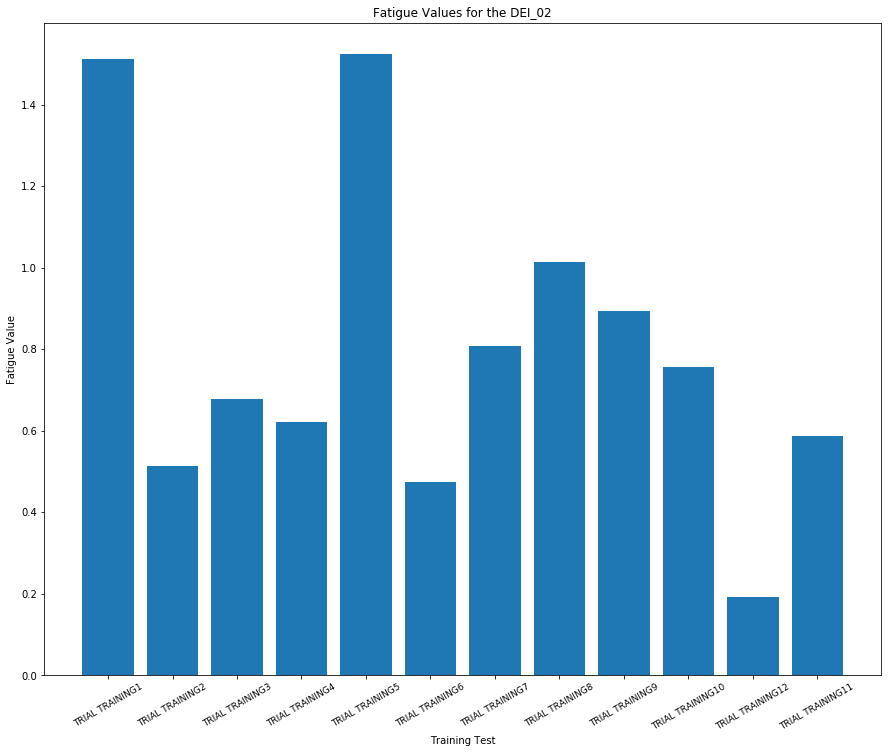

In [3]:
# Plot the fatigue values for a specific person

from matplotlib import pyplot as plt

%matplotlib inline  
x = [x[0] for x in values['DEI_02']]
y = [y[1] for y in values['DEI_02']]
plt.figure(figsize=(15,12))
plt.bar(x,y)
plt.title("Fatigue Values for the DEI_02")
plt.xlabel('Training Test')
plt.xticks(fontsize=9 , rotation=30)
plt.ylabel('Fatigue Value')
plt.show()